In [89]:
#CryptoClusters

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [91]:
# Loading data
file_path = Path("crypto_data.csv")
df_crypto = pd.read_csv(file_path,index_col=0)
df_crypto.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [92]:
newdf = df_crypto[(df_crypto.IsTrading == True)]
newdf = newdf.drop('IsTrading', axis=1)
newdf = newdf.dropna()
newdf = newdf[(newdf.TotalCoinsMined > 0)]
newdf = newdf.drop('CoinName', axis=1)
newdf

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [93]:
 
dummydf = pd.get_dummies(data = newdf,columns = ['Algorithm','ProofType'])
dummydf




,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
scaler = StandardScaler()
dummydf_scaled = scaler.fit_transform(dummydf)
dummydf_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Dimensionality Reduction

In [95]:
pca = PCA(n_components=.90)
pca_scaled = pca.fit_transform(dummydf_scaled)

# Verify Reduced size
pca_df = pd.DataFrame(data = pca_scaled)

In [96]:
# Run t-SNE
TSNE(learning_rate= 100)
tsne_features = pca.fit_transform(dummydf)
tsne_features


array([[-1.16293397e+10, -5.50257435e+08],
       [-1.06408764e+10, -1.19785243e+09],
       [ 2.75050695e+11,  1.31237019e+11],
       ...,
       [-9.92656677e+09, -6.98661475e+08],
       [-1.16075059e+10, -5.46071504e+08],
       [-1.16284097e+10, -5.49868345e+08]])

In [97]:
tsne_features.shape

(532, 2)

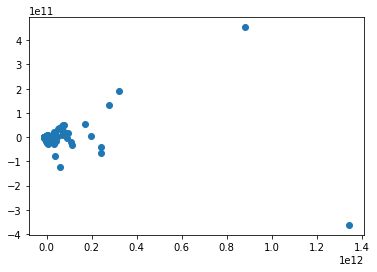

In [98]:
x = tsne_features[:,0]
y = tsne_features[:,1]
plt.scatter(x, y)
plt.show()


C:\Users\jlira\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


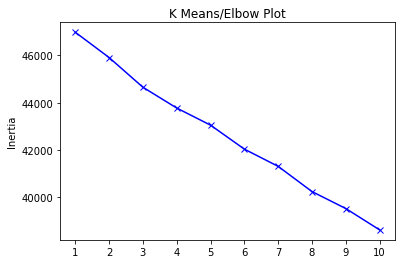

In [99]:
#Finding K
inertia = []
k = list(range(1, 11))


for i in k:

    k_Means = KMeans(n_clusters = i, random_state=0)
    k_Means.fit(pca_scaled)
    inertia.append(k_Means.inertia_)

k_data = {"k": k, "inertia":inertia}
df_kmean = pd.DataFrame(k_data)


#Elbow Plot
plt.plot(df_kmean['k'], df_kmean['inertia'],'bx-')
plt.xticks(range(1,11))
plt.title('K Means/Elbow Plot')
plt.ylabel('Inertia')
plt.show()

